In [9]:
# change csv data to np.array
import csv
import pandas as pd
pre_path = 'preprocessed/SPL_measurements.csv'
df = pd.read_csv(pre_path)

data = df.iloc[:, :-4].values
labels = df.iloc[:, -4].values
labels_pump = df.iloc[:, -3].values
labels_valve = df.iloc[:, -2].values
labels_rpm = df.iloc[:, -1].values

print(data)
print(np.shape(data))
# print(data)
# print(labels)
# print(labels_pump)
# print(labels_valve)
# print(labels_rpm)

# print(type(data))
# print(data.shape)
# print(data.dtype)

# print('length: ', len(data[0]))
# print(data[60][:10])

[[51.57299584 55.13792726 54.71951455 ... 60.52887966 59.75575401
  46.78886963]
 [49.47534196 55.22350322 50.89933357 ... 44.77302173 52.71052425
  51.62147535]
 [48.23555733 49.89814543 63.61419566 ... 40.39493435 51.49159046
  46.73246755]
 ...
 [26.81693392 37.49581735 42.33313461 ... 55.80998492 46.70412857
  44.41105729]
 [40.68352866 47.56803405 43.47534915 ... 56.46149251 48.51652705
  55.48561996]
 [45.96382644 53.09971721 44.29945974 ... 54.70822684 46.50312381
  47.59369401]]
(660, 512)


In [ ]:
import numpy as np
import librosa

# Assume fft_data is the FFT data obtained from the Tinkerforge device
psd = np.abs(fft_data)**2
mel_spec = librosa.feature.melspectrogram(S=psd, sr=sampling_rate, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length)


[[51.57299584 55.13792726 54.71951455 ... 60.52887966 59.75575401
  46.78886963]
 [49.47534196 55.22350322 50.89933357 ... 44.77302173 52.71052425
  51.62147535]
 [48.23555733 49.89814543 63.61419566 ... 40.39493435 51.49159046
  46.73246755]
 ...
 [26.81693392 37.49581735 42.33313461 ... 55.80998492 46.70412857
  44.41105729]
 [40.68352866 47.56803405 43.47534915 ... 56.46149251 48.51652705
  55.48561996]
 [45.96382644 53.09971721 44.29945974 ... 54.70822684 46.50312381
  47.59369401]]
[[51.57299584 49.47534196 48.23555733 ... 26.81693392 40.68352866
  45.96382644]
 [55.13792726 55.22350322 49.89814543 ... 37.49581735 47.56803405
  53.09971721]
 [54.71951455 50.89933357 63.61419566 ... 42.33313461 43.47534915
  44.29945974]
 ...
 [60.52887966 44.77302173 40.39493435 ... 55.80998492 56.46149251
  54.70822684]
 [59.75575401 52.71052425 51.49159046 ... 46.70412857 48.51652705
  46.50312381]
 [46.78886963 51.62147535 46.73246755 ... 44.41105729 55.48561996
  47.59369401]]


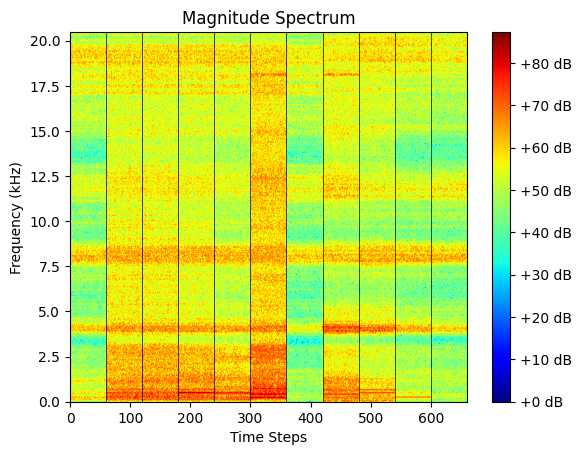

numpy.ndarray

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your data is stored in a numpy array named "data"
# The data has shape (time_steps, frequency_bins)

# Compute the magnitude spectrum
magnitude_spectrum = np.abs(data)
print(magnitude_spectrum)
print(magnitude_spectrum.T)
# Determine the frequency range of your data
freq_min = 0
freq_max = 20480 / 1000

# Plot the magnitude spectrum as a heatmap
# we have to transpose the spectrum because on the y axis we want the frequency
# which is stored in the 40 hertz bins on the x axis in the dataset and the 
# way around.
fig, ax = plt.subplots()
heatmap = ax.imshow(magnitude_spectrum.T, cmap='jet', aspect='auto', origin='lower',
                    extent=[0, magnitude_spectrum.shape[0], freq_min, freq_max])
                    # extend sets the bounding box for the plot, that means that 
                    # the x axis goes from 0 to the nr. of rows (time)
                    # and the y axis from freq_min to freq_max

# Add a colorbar
cbar = fig.colorbar(heatmap, format='%+2.0f dB')

# Add vertical lines every 60 steps
for i in range(60, magnitude_spectrum.shape[0], 60):
    ax.axvline(i, color='black', linewidth=0.5)
    
# Add axis labels and title
ax.set_xlabel('Time Steps')
ax.set_ylabel('Frequency (kHz)')
ax.set_title('Magnitude Spectrum')

# Display the plot
plt.show()
type(magnitude_spectrum.T)

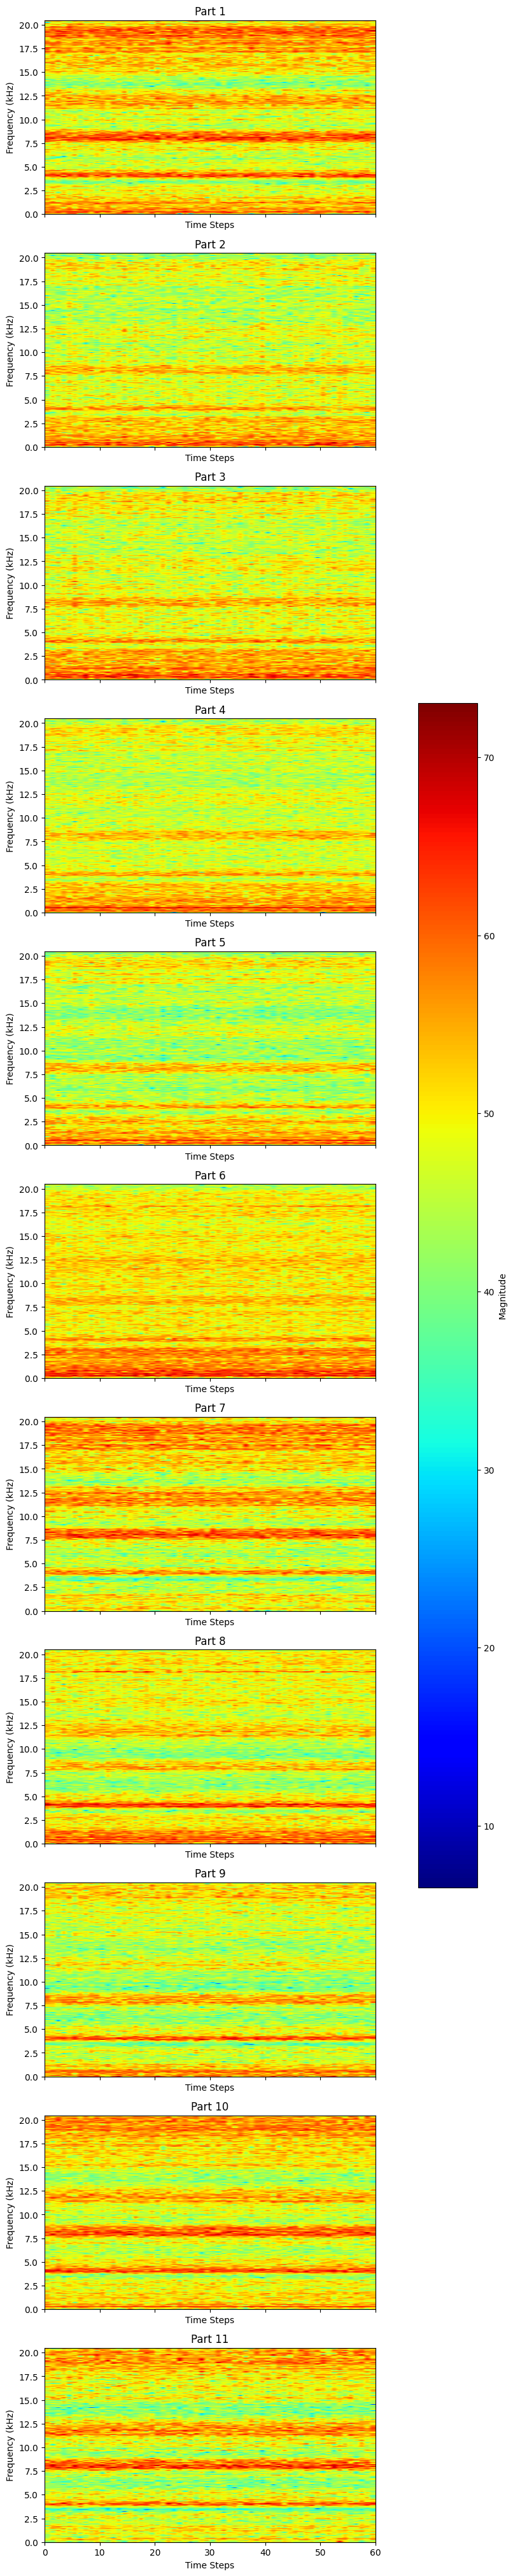

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your data is stored in a numpy array named "data"
# The data has shape (time_steps, frequency_bins)

# Compute the magnitude spectrum
magnitude_spectrum = np.abs(data)

# Determine the frequency range of your data in kHz
freq_min = 0
freq_max = 20.48

# Divide the data into 11 parts of 60 rows each
num_parts = 11
part_size = 60
parts = np.split(magnitude_spectrum[:num_parts*part_size,:], num_parts)

# Plot each part in a separate subplot
fig, axs = plt.subplots(nrows=num_parts, figsize=(8, num_parts*4), sharex=True, sharey=True)

for i, ax in enumerate(axs):
    heatmap = ax.imshow(parts[i].T, cmap='jet', aspect='auto', origin='lower',
                        extent=[0, part_size, freq_min, freq_max])
    ax.set_title(f'Part {i+1}')
    ax.set_xlabel('Time Steps')
    ax.set_ylabel('Frequency (kHz)')

# Add a colorbar
cbar = fig.colorbar(heatmap, ax=axs.ravel().tolist())
cbar.ax.set_ylabel('Magnitude')

# Adjust the layout of the subplots
plt.subplots_adjust(left=0.05, right=0.7, bottom=0.05, top=0.95, wspace=0.1, hspace=0.2)

# Display the plot
plt.show()


In [ ]:
import librosa

# load audio file
y, sr = librosa.load('audio_file.wav')

# compute power spectrogram
S = np.abs(librosa.stft(y, n_fft=2048, hop_length=512))**2

# convert to dB scale
S_db = librosa.power_to_db(S)

# apply mel filterbank
mel_basis = librosa.filters.mel(sr=sr, n_fft=2048, n_mels=64)
mel_S = np.dot(mel_basis, S_db)

# take the logarithm of the filtered outputs
log_mel_S = librosa.amplitude_to_db(mel_S, ref=np.max)

# display the resulting mel-spectrogram
librosa.display.specshow(log_mel_S, sr=sr, hop_length=512, x_axis='time', y_axis='mel')
